<a href="https://colab.research.google.com/github/JaynthReddy91/MachineLearning/blob/main/ML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# (a) Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display dataset information
print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# Standardize features (important for regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (b) Split the data: 80% training + validation, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Regression Models ---
# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_score = lin_reg.score(X_test, y_test)

# 2. Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

# 3. Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

# --- Cross-validation for model evaluation ---
cv_lin = cross_val_score(lin_reg, X_scaled, y, cv=5).mean()
cv_ridge = cross_val_score(ridge, X_scaled, y, cv=5).mean()
cv_lasso = cross_val_score(lasso, X_scaled, y, cv=5).mean()

# --- Print Results ---
print("\nModel Performance (R^2 Scores):")
print(f"Linear Regression Test Score: {lin_score:.4f}")
print(f"Ridge Regression Test Score:  {ridge_score:.4f}")
print(f"Lasso Regression Test Score:  {lasso_score:.4f}")

print("\nCross-Validation Mean Scores:")
print(f"Linear Regression CV Mean: {cv_lin:.4f}")
print(f"Ridge Regression CV Mean:  {cv_ridge:.4f}")
print(f"Lasso Regression CV Mean:  {cv_lasso:.4f}")


Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64

Model Performance (R^2 Scores):
Linear Regression Test Score: 0.7271
Ridge Regression Test Score:  0.7359
Lasso Regression Test Score:  0.6786

Cross-Validation Mean Scores:
Linear Regression CV Mean: 0.7047
Ridge Regression CV Mean:  0.7091
Lasso Regression CV Mean:  0.5921


Accuracy: 0.9737

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



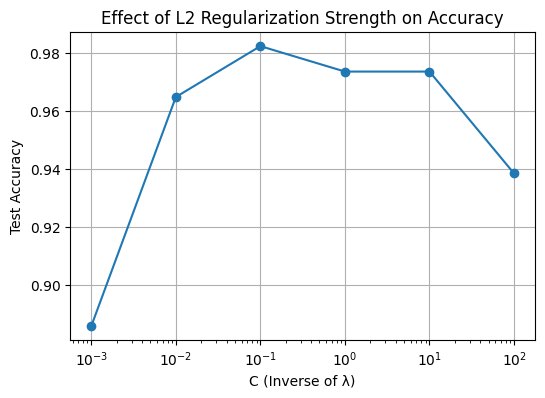

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Experiment with different regularization strengths
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred_C = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_C))

# Plot effect of regularization strength
plt.figure(figsize=(6,4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.title("Effect of L2 Regularization Strength on Accuracy")
plt.xlabel("C (Inverse of λ)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

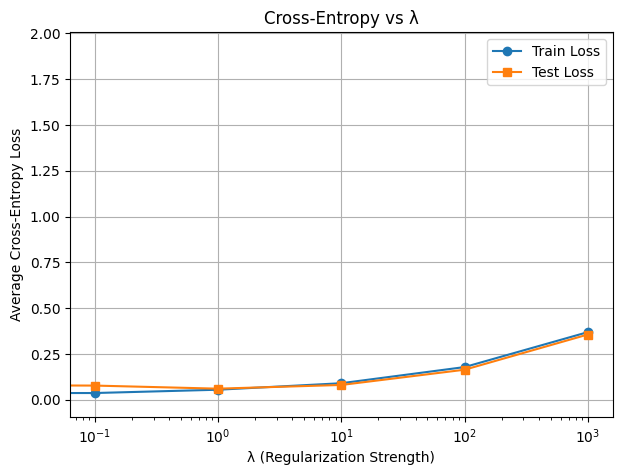

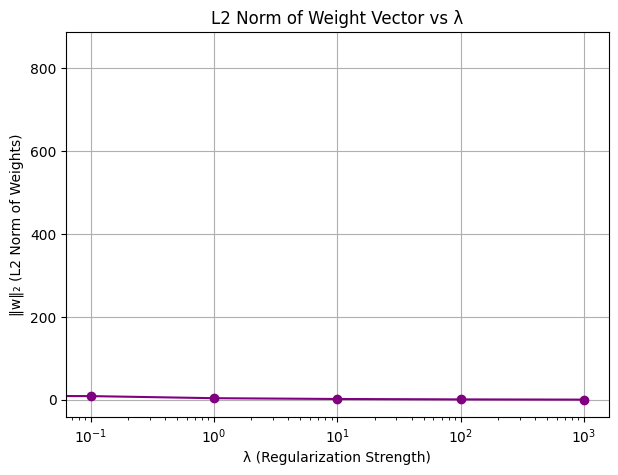

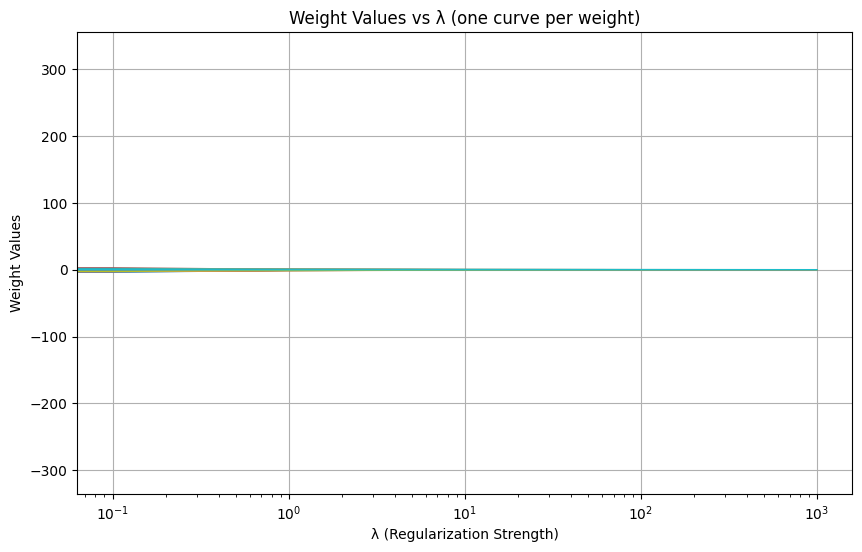

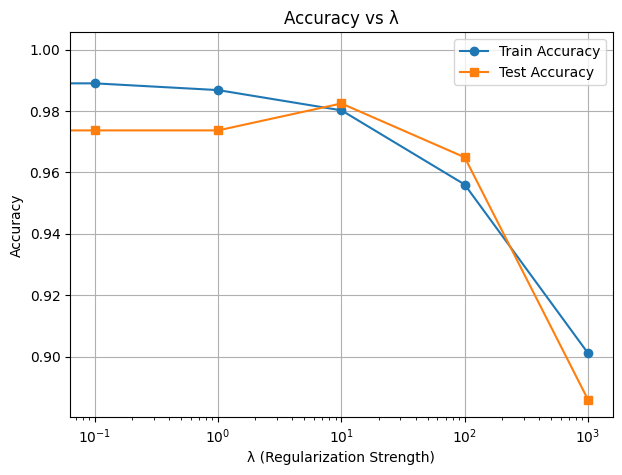

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Regularization parameters λ and corresponding C = 1/λ
lambdas = [0, 0.1, 1, 10, 100, 1000]
Cs = [np.inf if l == 0 else 1 / l for l in lambdas]  # λ=0 means no regularization

train_losses, test_losses = [], []
train_accs, test_accs = [], []
weight_norms = []
weights_list = []

# Train models for each λ value
for C in Cs:
    if C == np.inf:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)

    model.fit(X_train, y_train)

    # Predictions and probabilities
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)

    # Cross-entropy (log loss)
    train_losses.append(log_loss(y_train, y_train_pred_proba))
    test_losses.append(log_loss(y_test, y_test_pred_proba))

    # Accuracy
    train_accs.append(accuracy_score(y_train, model.predict(X_train)))
    test_accs.append(accuracy_score(y_test, model.predict(X_test)))

    # Weight info
    w = model.coef_.flatten()
    weights_list.append(w)
    weight_norms.append(np.linalg.norm(w))

# Convert to arrays for easier plotting
weights_array = np.array(weights_list)

# ---- Plot 1: Cross-Entropy Loss ----
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='s', label="Test Loss")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Average Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot 2: L2 Norm of Weights ----
plt.figure(figsize=(7,5))
plt.plot(lambdas, weight_norms, marker='o', color='purple')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("‖w‖₂ (L2 Norm of Weights)")
plt.title("L2 Norm of Weight Vector vs λ")
plt.grid(True)
plt.show()

# ---- Plot 3: Individual Weight Values ----
plt.figure(figsize=(10,6))
for i in range(weights_array.shape[1]):
    plt.plot(lambdas, weights_array[:, i], lw=1)
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Weight Values")
plt.title("Weight Values vs λ (one curve per weight)")
plt.grid(True)
plt.show()

# ---- Plot 4: Accuracy ----
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='s', label="Test Accuracy")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
num_basis = 5
means = np.linspace(-10, 10, num_basis)  # 5 evenly spaced means
sigma_values = [0.1, 0.5, 1, 5, 10]

# Function to apply Gaussian basis functions
def gaussian_basis_transform(X, means, sigma):
    n_samples, n_features = X.shape
    transformed_features = []

    for i in range(n_features):   # for each original feature
        for mu in means:
            # Apply Gaussian basis
            transformed = np.exp(-((X[:, i] - mu) ** 2) / (2 * sigma ** 2))
            transformed_features.append(transformed.reshape(-1, 1))

    # Concatenate all transformed features
    X_transformed = np.hstack(transformed_features)
    return X_transformed

# Example: transform using σ = 1
sigma = 1
X_gaussian = gaussian_basis_transform(X_scaled, means, sigma)
print("Original shape:", X_scaled.shape)
print("Transformed shape:", X_gaussian.shape)

Original shape: (569, 30)
Transformed shape: (569, 150)


Baseline Train Loss: 0.0002, Test Loss: 1.9114


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


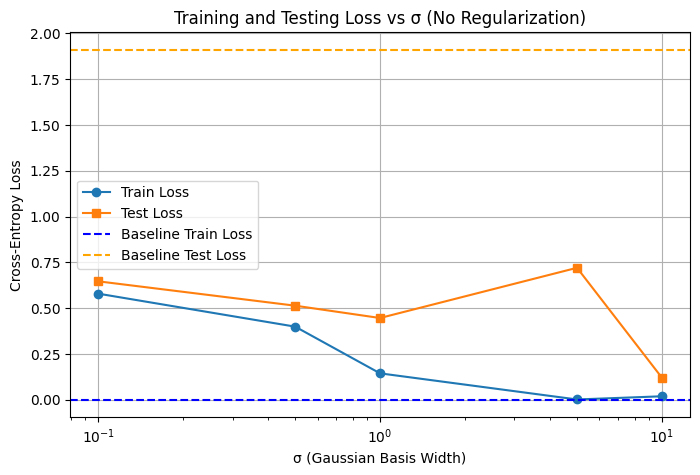

In [ ]:
from sklearn.metrics import log_loss
# Function to apply Gaussian basis transformation
def gaussian_basis_transform(X, means, sigma):
    n_samples, n_features = X.shape
    transformed_features = []

    for i in range(n_features):
        for mu in means:
            transformed = np.exp(-((X[:, i] - mu) ** 2) / (2 * sigma ** 2))
            transformed_features.append(transformed.reshape(-1, 1))

    return np.hstack(transformed_features)

# Parameters
num_basis = 5
means = np.linspace(-10, 10, num_basis)
sigma_values = [0.1, 0.5, 1, 5, 10]

# Baseline errors from part (c) using original features, no regularization
baseline_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
baseline_model.fit(X_train, y_train)
baseline_train_loss = log_loss(y_train, baseline_model.predict_proba(X_train))
baseline_test_loss = log_loss(y_test, baseline_model.predict_proba(X_test))
print(f"Baseline Train Loss: {baseline_train_loss:.4f}, Test Loss: {baseline_test_loss:.4f}")

# Arrays to store errors for each sigma
train_losses, test_losses = [], []

# Run regression for each σ
for sigma in sigma_values:
    X_train_gauss = gaussian_basis_transform(X_train, means, sigma)
    X_test_gauss = gaussian_basis_transform(X_test, means, sigma)

    # Logistic regression with no regularization
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute training and testing errors (cross-entropy)
    train_loss = log_loss(y_train, model.predict_proba(X_train_gauss))
    test_loss = log_loss(y_test, model.predict_proba(X_test_gauss))

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot errors vs sigma
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_losses, marker='o', label='Train Loss')
plt.plot(sigma_values, test_losses, marker='s', label='Test Loss')
plt.axhline(y=baseline_train_loss, color='blue', linestyle='--', label='Baseline Train Loss')
plt.axhline(y=baseline_test_loss, color='orange', linestyle='--', label='Baseline Test Loss')
plt.xscale('log')
plt.xlabel("σ (Gaussian Basis Width)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training and Testing Loss vs σ (No Regularization)")
plt.legend()
plt.grid(True)
plt.show()

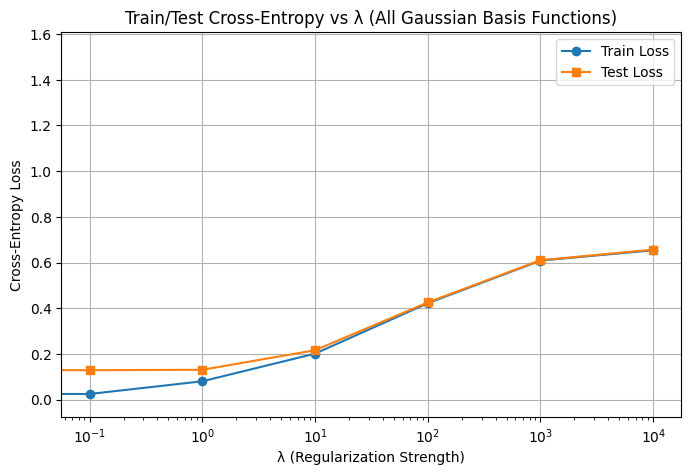

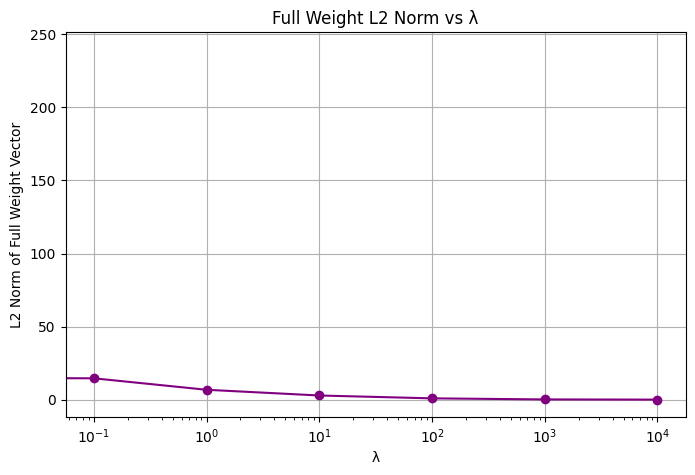

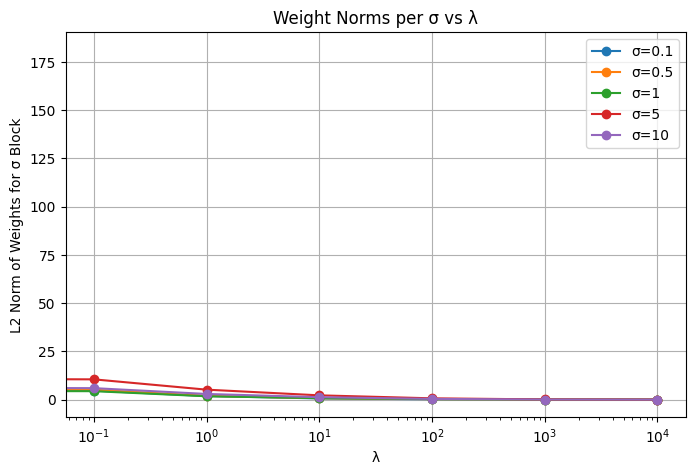

In [ ]:
# Gaussian basis function
def gaussian_basis_transform(X, means, sigma):
    n_samples, n_features = X.shape
    transformed_features = []
    for i in range(n_features):
        for mu in means:
            transformed = np.exp(-((X[:, i] - mu) ** 2) / (2 * sigma ** 2))
            transformed_features.append(transformed.reshape(-1,1))
    return np.hstack(transformed_features)

# Parameters
num_basis = 5
sigma_values = [0.1, 0.5, 1, 5, 10]
means = np.linspace(-10, 10, num_basis)
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]
Cs = [np.inf if l == 0 else 1/l for l in lambda_values]  # C = 1/lambda

# Transform training and test data for all σ and concatenate
X_train_all = np.hstack([gaussian_basis_transform(X_train, means, sigma) for sigma in sigma_values])
X_test_all  = np.hstack([gaussian_basis_transform(X_test,  means, sigma) for sigma in sigma_values])

# Number of features per σ block
features_per_sigma = X_train_all.shape[1] // len(sigma_values)

# Store results
train_losses, test_losses = [], []
weight_norms = []
sigma_weight_norms = {sigma: [] for sigma in sigma_values}

# Run regression for each λ
for C in Cs:
    if C == np.inf:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000)
    else:
        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=2000)

    model.fit(X_train_all, y_train)

    # Predictions & cross-entropy
    y_train_pred = model.predict_proba(X_train_all)
    y_test_pred = model.predict_proba(X_test_all)
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    # Full weight vector L2 norm
    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w))

    # L2 norm per σ block
    for i, sigma in enumerate(sigma_values):
        start = i*features_per_sigma
        end = (i+1)*features_per_sigma
        sigma_weight_norms[sigma].append(np.linalg.norm(w[start:end]))

# ---- Plot 1: Cross-entropy vs λ ----
plt.figure(figsize=(8,5))
plt.plot(lambda_values, train_losses, marker='o', label='Train Loss')
plt.plot(lambda_values, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Cross-Entropy vs λ (All Gaussian Basis Functions)")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot 2: Full weight L2 norm vs λ ----
plt.figure(figsize=(8,5))
plt.plot(lambda_values, weight_norms, marker='o', color='purple')
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("L2 Norm of Full Weight Vector")
plt.title("Full Weight L2 Norm vs λ")
plt.grid(True)
plt.show()

# ---- Plot 3: Weight L2 norm per σ block ----
plt.figure(figsize=(8,5))
for sigma in sigma_values:
    plt.plot(lambda_values, sigma_weight_norms[sigma], marker='o', label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("L2 Norm of Weights for σ Block")
plt.title("Weight Norms per σ vs λ")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 or 1

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters
M = 10             # number of RBF units
sigma = 1.0        # fixed width
lambda_reg = 0.1   # L2 regularization
eta = 0.01         # learning rate for mu
n_iters = 50       # iterations for gradient updates

# Initialize RBF centers randomly from training data
np.random.seed(42)
mu = X_train[np.random.choice(len(X_train), M, replace=False)]

# Gaussian RBF function
def rbf(x, mu, sigma):
    return np.exp(-np.sum((x - mu)**2, axis=1) / (2 * sigma**2))

# Training loop
for it in range(n_iters):
    # Compute design matrix
    Phi = np.zeros((X_train.shape[0], M))
    for i in range(M):
        Phi[:, i] = rbf(X_train, mu[i], sigma)

    # Update weights (ridge regression)
    w = np.linalg.inv(Phi.T @ Phi + lambda_reg * np.eye(M)) @ Phi.T @ y_train

    # Update centers using gradient descent
    for i in range(M):
        # Gradient for center i
        error = Phi @ w - y_train  # shape (N,)
        grad_mu = np.sum((error * w[i])[:, None] * (X_train - mu[i]) / sigma**2, axis=0)
        mu[i] -= eta * grad_mu

# Prediction on test set
Phi_test = np.zeros((X_test.shape[0], M))
for i in range(M):
    Phi_test[:, i] = rbf(X_test, mu[i], sigma)
y_pred_prob = Phi_test @ w
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.37719298245614036


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2.1 Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# 2.2 Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))

# 2.3 Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))


Linear Regression R2: 0.575787706032451


TypeError: got an unexpected keyword argument 'squared'